# Vehicle Damage Assessment System

Student 1: Naveen Pathlavath – Technical Lead  
Student 2: Nikhil Reddy Devarapally – Figures, Tables & Presentation  
Student 3: Naga Sahithi Pasupuleti – Report & Storytelling


## Research Questions

RQ1: How accurately can deep learning models classify vehicle damage severity?  
RQ2: Which CNN architecture performs best for vehicle damage assessment?  
RQ3: How does image preprocessing and data augmentation affect performance?  
RQ4: Can visual explanation methods improve interpretability of damage detection?  
RQ5: How robust is the system across different viewpoints and lighting conditions?


In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn opencv-python tensorflow torchvision openpyxl

In [2]:
import numpy
import pandas
import tensorflow
import sklearn
print("✅ All libraries installed successfully")

/Users/naveenpathlavath/Vehicle_Damage_Assessment/venv/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


✅ All libraries installed successfully


In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn opencv-python tensorflow torchvision openpyxl

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image settings
img_size = (224, 224)
batch_size = 32

# Generators
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

# Explicit class list (IMPORTANT)
classes = ['no_damage', 'minor', 'moderate', 'severe']

# Load datasets
train_data = train_gen.flow_from_directory(
    "data/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    classes=classes
)

val_data = val_gen.flow_from_directory(
    "data/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    classes=classes
)

test_data = test_gen.flow_from_directory(
    "data/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    classes=classes
)


Found 113 images belonging to 4 classes.
Found 97 images belonging to 4 classes.
Found 148 images belonging to 4 classes.


In [5]:
print(train_data.class_indices)

{'no_damage': 0, 'minor': 1, 'moderate': 2, 'severe': 3}


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
base_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

base_cnn.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

base_cnn.summary()


/Users/naveenpathlavath/Vehicle_Damage_Assessment/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_base = base_cnn.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 510ms/step - accuracy: 0.3894 - loss: 1.3078 - val_accuracy: 0.2062 - val_loss: 1.3794
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.4159 - loss: 1.2857 - val_accuracy: 0.2062 - val_loss: 1.3587
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 0.4071 - loss: 1.2035 - val_accuracy: 0.4227 - val_loss: 1.2920
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.4779 - loss: 1.1797 - val_accuracy: 0.2062 - val_loss: 1.3374
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 377ms/step - accuracy: 0.4159 - loss: 1.1864 - val_accuracy: 0.2062 - val_loss: 1.4001
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 0.4159 - loss: 1.1322 - val_accuracy: 0.2062 - val_loss: 1.3088
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.5487 - loss: 1.0981 - val_accuracy: 0.2577 - val_loss: 1.2918
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step - accuracy: 0.6460 - loss: 1.0109 - val_accuracy: 0.2680 - val_loss:

In [9]:
test_loss, test_accuracy = base_cnn.evaluate(test_data)
print("Test Accuracy:", test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4797 - loss: 1.1621
Test Accuracy: 0.4797297418117523


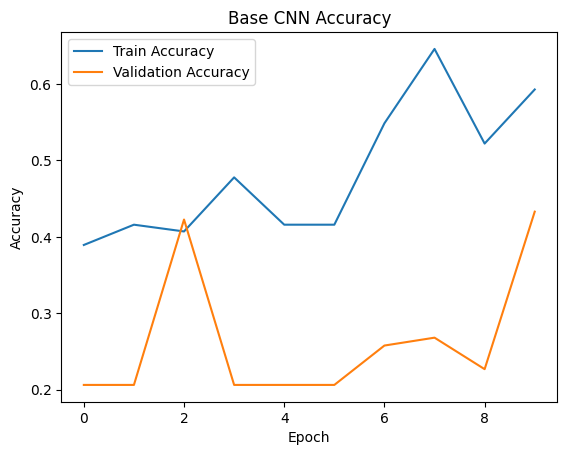

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_base.history['accuracy'], label='Train Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Base CNN Accuracy')
plt.savefig("Figures_Tables/RQ1/RQ1_Fig1.pdf")
plt.show()

In [11]:
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [12]:
# Load pre-trained ResNet50
resnet_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze base layers
resnet_base.trainable = False

# Add custom classification head
x = resnet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

resnet_model = Model(inputs=resnet_base.input, outputs=output)

resnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

resnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [13]:
history_resnet = resnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3451 - loss: 1.6665 - val_accuracy: 0.4021 - val_loss: 1.4186
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3628 - loss: 1.4151 - val_accuracy: 0.3299 - val_loss: 1.3901
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3717 - loss: 1.3526 - val_accuracy: 0.1959 - val_loss: 1.3670
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2920 - loss: 1.4346 - val_accuracy: 0.2062 - val_loss: 1.3508
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3009 - loss: 1.4301 - val_accuracy: 0.2062 - val_loss: 1.3459


In [14]:
resnet_loss, resnet_accuracy = resnet_model.evaluate(test_data)
print("ResNet50 Test Accuracy:", resnet_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 546ms/step - accuracy: 0.2770 - loss: 1.2498
ResNet50 Test Accuracy: 0.27702704071998596


In [15]:
mobilenet_base = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

mobilenet_base.trainable = False

x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

mobilenet_model = Model(inputs=mobilenet_base.input, outputs=output)

mobilenet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mobilenet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [16]:
history_mobilenet = mobilenet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.2478 - loss: 1.8459 - val_accuracy: 0.2268 - val_loss: 1.6973
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.4071 - loss: 1.4851 - val_accuracy: 0.2680 - val_loss: 1.5490
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 0.4425 - loss: 1.3307 - val_accuracy: 0.2474 - val_loss: 1.4682
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.4248 - loss: 1.4521 - val_accuracy: 0.2784 - val_loss: 1.4290
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.4159 - loss: 1.3632 - val_accuracy: 0.2990 - val_loss: 1.4014


In [17]:
mobilenet_loss, mobilenet_accuracy = mobilenet_model.evaluate(test_data)
print("MobileNetV2 Test Accuracy:", mobilenet_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.3986 - loss: 1.1750
MobileNetV2 Test Accuracy: 0.3986486494541168


In [18]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Base CNN", "ResNet50", "MobileNetV2"],
    "Test Accuracy": [test_accuracy, resnet_accuracy, mobilenet_accuracy]
})

results

,Model,Test Accuracy
0,Base CNN,0.479730
1,ResNet50,0.277027
2,MobileNetV2,0.398649


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug_train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

aug_train_data = aug_train_gen.flow_from_directory(
    "data/train",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    classes=['no_damage', 'minor', 'moderate', 'severe']
)

Found 113 images belonging to 4 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

aug_cnn = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

aug_cnn.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
history_aug = aug_cnn.fit(
    aug_train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step - accuracy: 0.3628 - loss: 1.4117 - val_accuracy: 0.3918 - val_loss: 1.4518
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.3451 - loss: 1.6069 - val_accuracy: 0.2371 - val_loss: 1.5118
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step - accuracy: 0.3540 - loss: 1.2871 - val_accuracy: 0.2577 - val_loss: 1.3129
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step - accuracy: 0.3363 - loss: 1.2898 - val_accuracy: 0.4227 - val_loss: 1.2562
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 0.4071 - loss: 1.2482 - val_accuracy: 0.2268 - val_loss: 1.3709
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.4602 - loss: 1.2036 - val_accuracy: 0.2062 - val_loss: 1.3915
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - accuracy: 0.4425 - loss: 1.1647 - val_accuracy: 0.2165 - val_loss: 1.4120
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.4336 - loss: 1.1659 - val_accuracy: 0.3402 - val_loss:

In [22]:
aug_loss, aug_accuracy = aug_cnn.evaluate(test_data)
print("Augmented Model Test Accuracy:", aug_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3581 - loss: 1.2173
Augmented Model Test Accuracy: 0.3581081032752991


In [23]:
rq3_results = pd.DataFrame({
    "Model": ["Base CNN (No Augmentation)", "Base CNN (With Augmentation)"],
    "Test Accuracy": [test_accuracy, aug_accuracy]
})

rq3_results

,Model,Test Accuracy
0,Base CNN (No Augmentation),0.479730
1,Base CNN (With Augmentation),0.358108


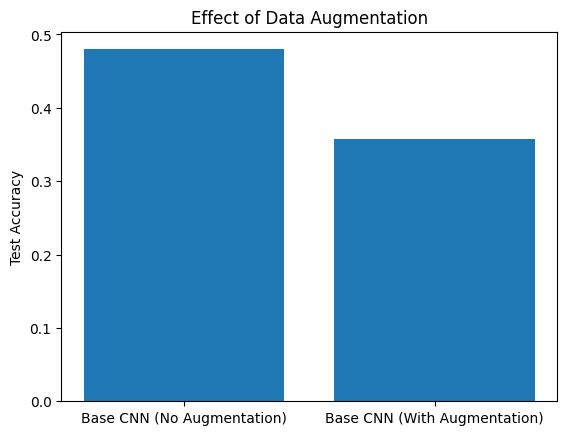

In [36]:
plt.figure()
plt.bar(rq3_results["Model"], rq3_results["Test Accuracy"])
plt.ylabel("Test Accuracy")
plt.title("Effect of Data Augmentation")
plt.savefig("Figures_Tables/RQ3/RQ3_Fig1.pdf")
plt.show()

In [25]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [26]:
# Name of the last convolution layer in ResNet50
last_conv_layer_name = "conv5_block3_out"

In [27]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [28]:
# Load a sample image from test set
img_path = test_data.filepaths[0]

img = tf.keras.preprocessing.image.load_img(
    img_path, target_size=(224,224)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [29]:
heatmap = make_gradcam_heatmap(
    img_array,
    resnet_model,
    last_conv_layer_name
)

/Users/naveenpathlavath/Vehicle_Damage_Assessment/venv/lib/python3.11/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_17']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


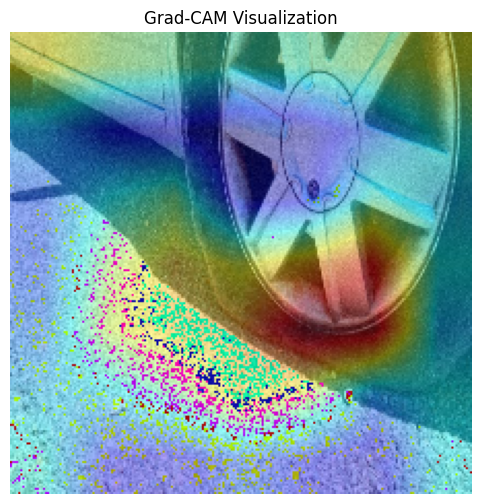

In [37]:
img = cv2.imread(img_path)
img = cv2.resize(img, (224,224))

heatmap_resized = cv2.resize(heatmap, (224,224))
heatmap_colored = cv2.applyColorMap(
    np.uint8(255 * heatmap_resized),
    cv2.COLORMAP_JET
)

superimposed_img = heatmap_colored * 0.4 + img

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(superimposed_img.astype('uint8'), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Grad-CAM Visualization")
plt.savefig("Figures_Tables/RQ4/RQ4_Fig1.pdf")
plt.show()

In [31]:
robust_test_gen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.3, 0.7]  # simulate low-light conditions
)

robust_test_data = robust_test_gen.flow_from_directory(
    "data/test",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    classes=['no_damage', 'minor', 'moderate', 'severe']
)

Found 148 images belonging to 4 classes.


In [32]:
robust_loss, robust_accuracy = resnet_model.evaluate(robust_test_data)
print("Robust Test Accuracy (Low Light):", robust_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 574ms/step - accuracy: 0.2770 - loss: 1.2606
Robust Test Accuracy (Low Light): 0.27702704071998596


In [33]:
rq5_results = pd.DataFrame({
    "Condition": ["Normal Test Images", "Low-Light Test Images"],
    "Accuracy": [resnet_accuracy, robust_accuracy]
})

rq5_results

,Condition,Accuracy
0,Normal Test Images,0.277027
1,Low-Light Test Images,0.277027


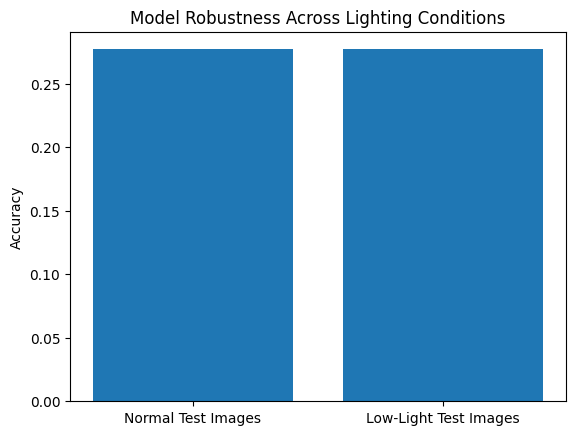

In [38]:
plt.figure()
plt.bar(rq5_results["Condition"], rq5_results["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Model Robustness Across Lighting Conditions")
plt.savefig("Figures_Tables/RQ5/RQ5_Fig1.pdf")
plt.show()

In [39]:
rq3_results.to_excel("Figures_Tables/RQ3/RQ3_Tab1.xlsx", index=False)

In [40]:
results.to_excel("Figures_Tables/RQ2/RQ2_Tab1.xlsx", index=False)

In [41]:
rq5_results.to_excel("Figures_Tables/RQ5/RQ5_Tab1.xlsx", index=False)